In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [3]:
import datetime
import os
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import dates as mdates

from funcs.ios import get_excel_sheet
from structs.res import AppRes

In [15]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()

In [217]:
res = AppRes()
file = "ticks_20250819.xlsx"
path_excel = os.path.join("..", res.dir_collection, file)
code = "7011"
df = get_excel_sheet(path_excel, code)
df.index = pd.to_datetime([datetime.datetime.fromtimestamp(ts) for ts in df["Time"]])
df

,Time,Price,Volume
2025-08-19 09:01:17.689856,1.755562e+09,4036,1826100
2025-08-19 09:01:18.692876,1.755562e+09,4036,1826100
2025-08-19 09:01:19.675019,1.755562e+09,4031,1879100
2025-08-19 09:01:20.672993,1.755562e+09,4031,1879100
2025-08-19 09:01:21.687569,1.755562e+09,4030,1895200
...,...,...,...
2025-08-19 15:24:55.392636,1.755585e+09,3913,25373500
2025-08-19 15:24:56.383619,1.755585e+09,3913,25373500
2025-08-19 15:24:57.386104,1.755585e+09,3915,25377000
2025-08-19 15:24:58.392595,1.755585e+09,3915,25377000


In [218]:
df["uVol"] = df["Volume"].diff(2)
df["rVol"] = df["uVol"].rolling(window=30, min_periods=1).sum()
df["dVol"] = df["rVol"].diff()
df["obs_vol"] = np.tanh(df["dVol"] / 100000.)
df

,Time,Price,Volume,uVol,rVol,dVol,obs_vol
2025-08-19 09:01:17.689856,1.755562e+09,4036,1826100,NaN,NaN,NaN,NaN
2025-08-19 09:01:18.692876,1.755562e+09,4036,1826100,NaN,NaN,NaN,NaN
2025-08-19 09:01:19.675019,1.755562e+09,4031,1879100,53000.0,53000.0,NaN,NaN
2025-08-19 09:01:20.672993,1.755562e+09,4031,1879100,53000.0,106000.0,53000.0,0.485381
2025-08-19 09:01:21.687569,1.755562e+09,4030,1895200,16100.0,122100.0,16100.0,0.159623
...,...,...,...,...,...,...,...
2025-08-19 15:24:55.392636,1.755585e+09,3913,25373500,800.0,118100.0,-500.0,-0.005000
2025-08-19 15:24:56.383619,1.755585e+09,3913,25373500,800.0,117600.0,-500.0,-0.005000
2025-08-19 15:24:57.386104,1.755585e+09,3915,25377000,3500.0,120200.0,2600.0,0.025994
2025-08-19 15:24:58.392595,1.755585e+09,3915,25377000,3500.0,122800.0,2600.0,0.025994


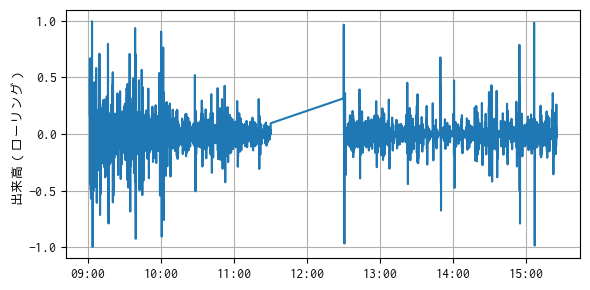

In [219]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(df["obs_vol"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_ylabel("出来高（ローリング）")
ax.grid()
plt.tight_layout()
plt.show()